In [ ]:
#importing essential packages
import numpy as np
import pandas as pd

In [ ]:
#reading dataset
df=pd.read_csv('datasets_4458_8204_winequality-red.csv')


# **1)EDA**

# A.Understanding the data

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# **B.Visualizing**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

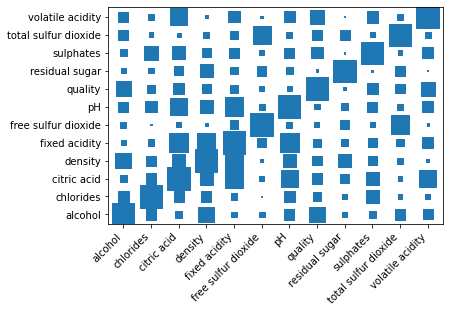

In [ ]:
#Finding correlation
#Issue 1: Plot a correlation heatmap (including all columns)

df.corr()
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = df.columns
corr = df.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


UNIVARIATE ANALYSIS-HISTOGRAMS:


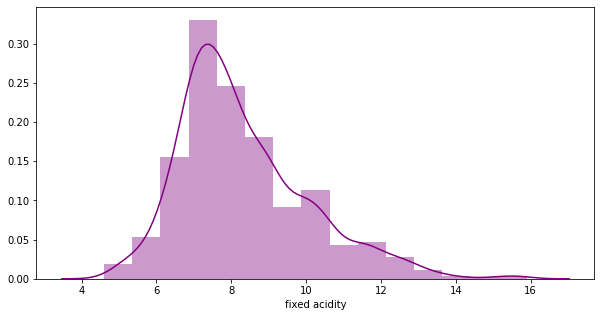

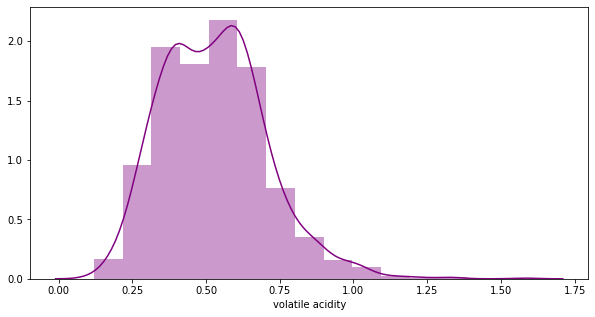

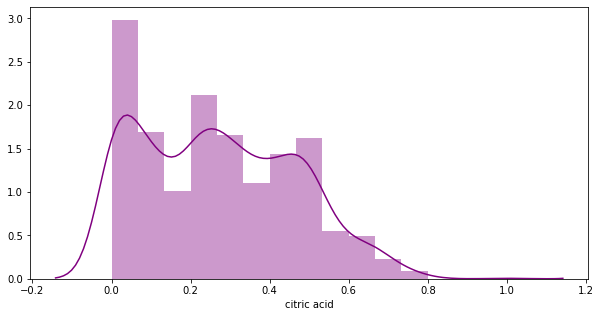

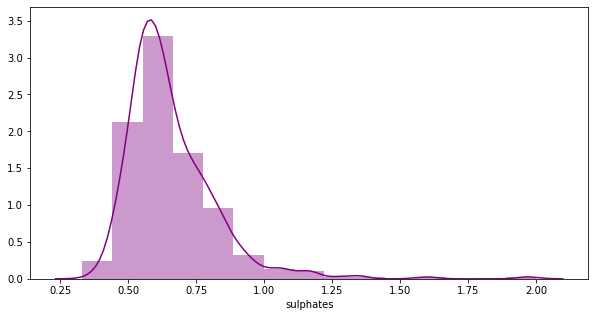

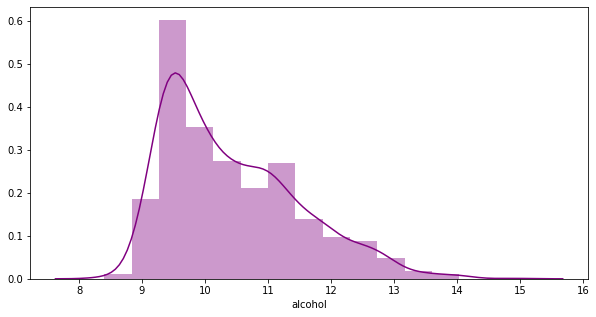

In [ ]:
print("UNIVARIATE ANALYSIS-HISTOGRAMS:")
for i in [0,1,2,9,10]:
    plt.subplots(figsize=(10,5))
    sns.distplot(df.iloc[:,i],color='purple',bins=15)
    plt.show()
    

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
12


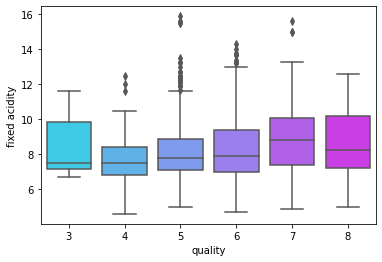

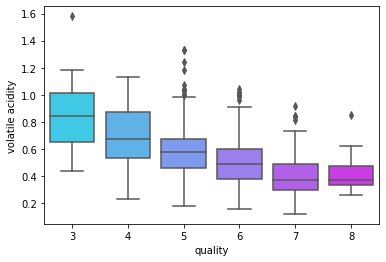

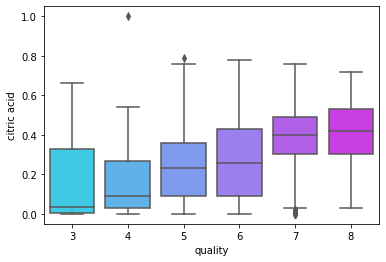

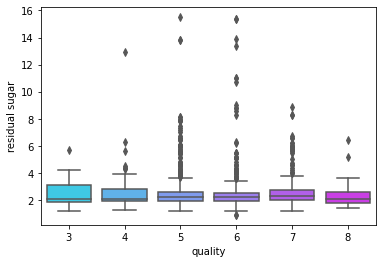

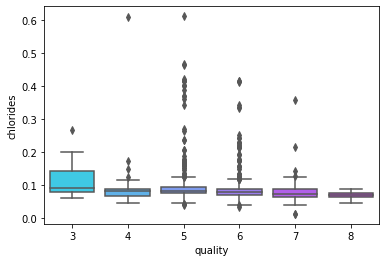

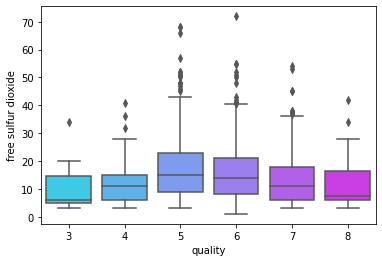

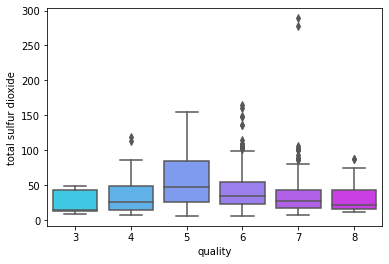

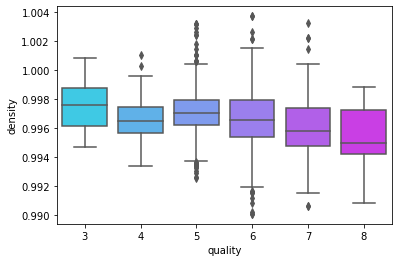

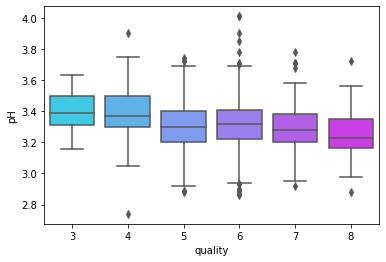

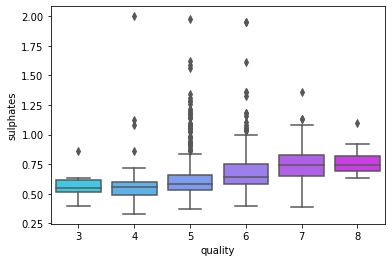

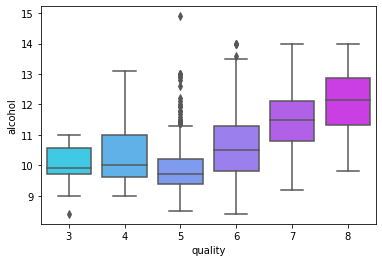

In [ ]:
#Issue 2: A boxplot has been given by the developer only for citric acid and density. Plot similar boxplots for each of the columns against quality (using the feature 'quality' as one of the axes)
#Mention if any linear trends are clearly noticeable
z=df.columns
print(z)
x=len(z)
print(x)
for i in range(0,x-1):
  sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,i],palette="cool")
  plt.show()

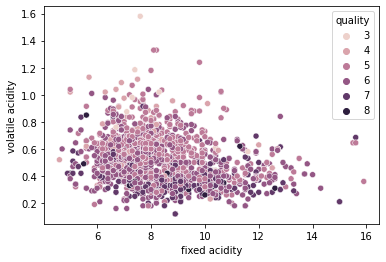

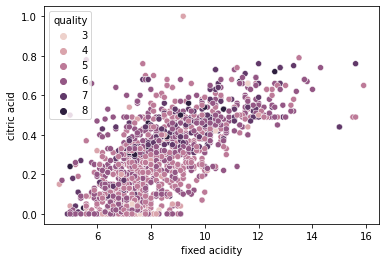

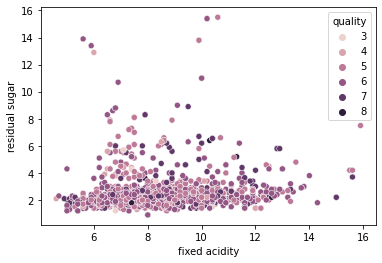

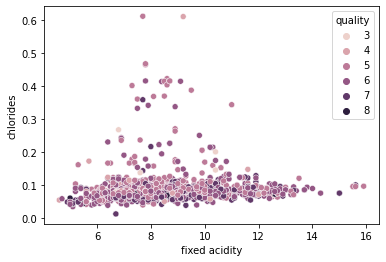

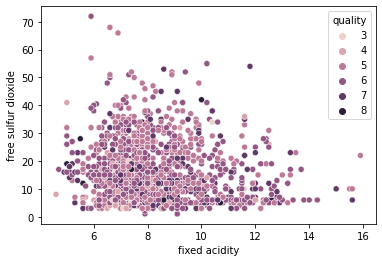

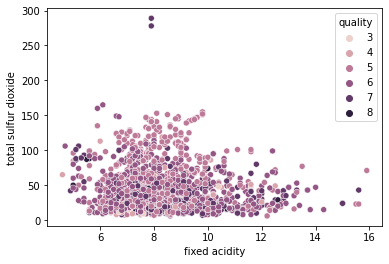

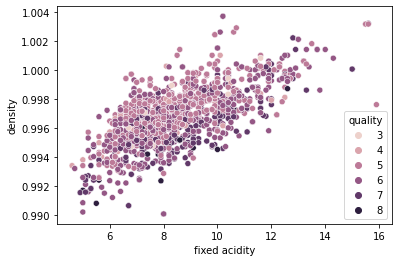

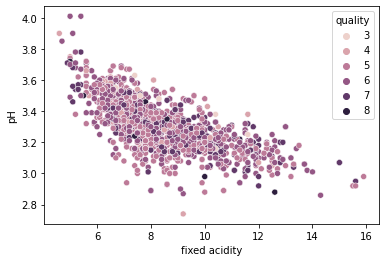

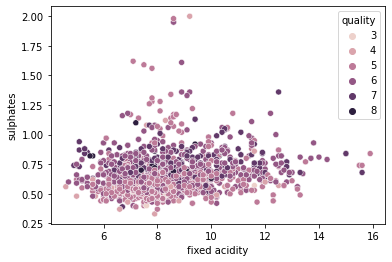

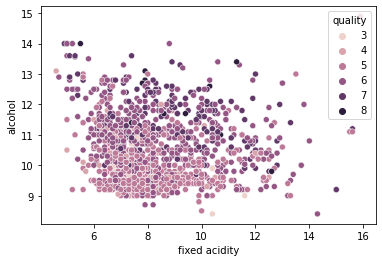

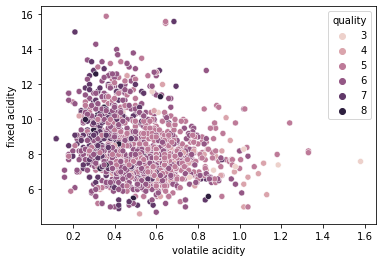

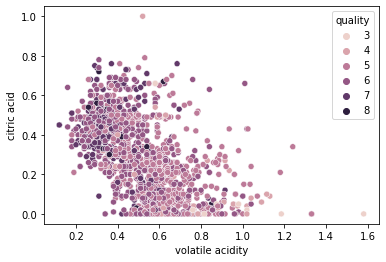

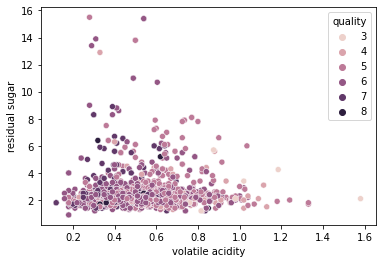

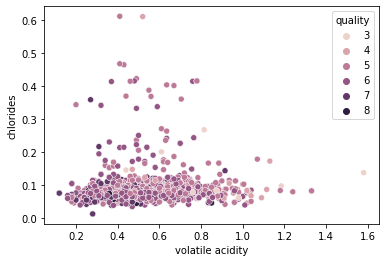

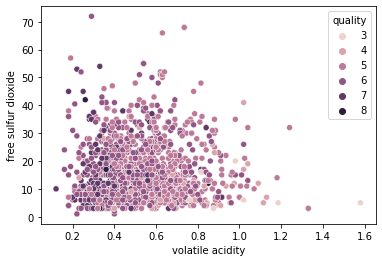

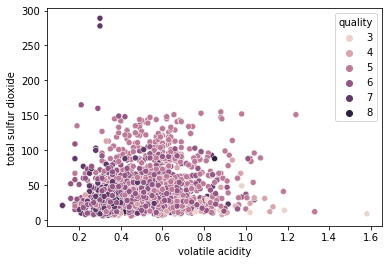

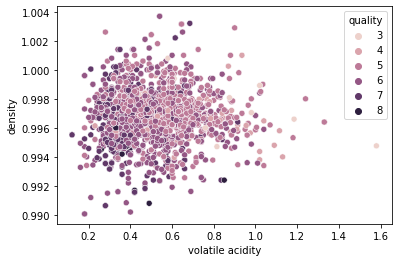

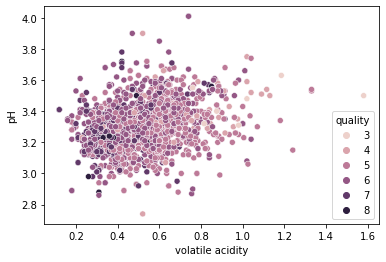

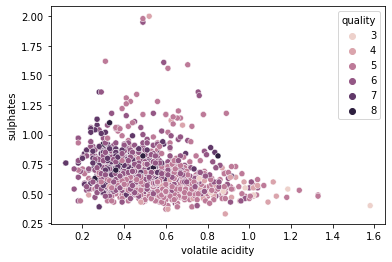

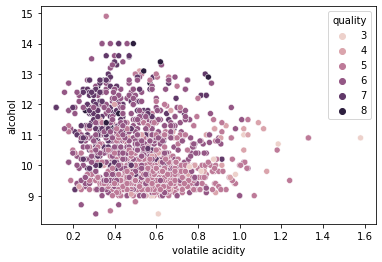

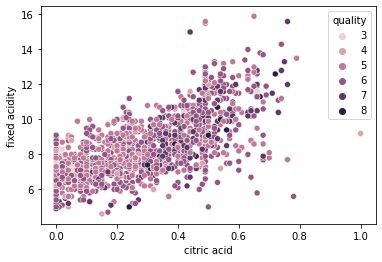

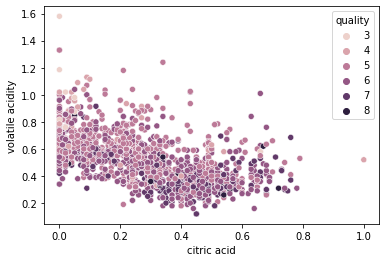

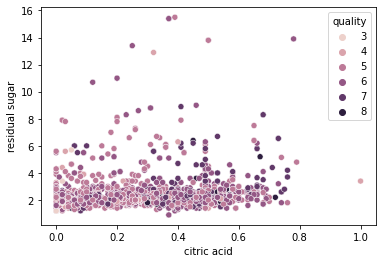

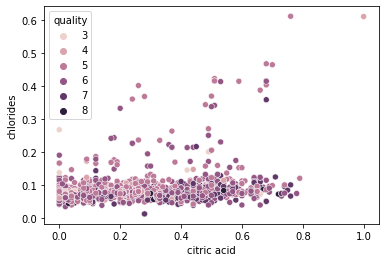

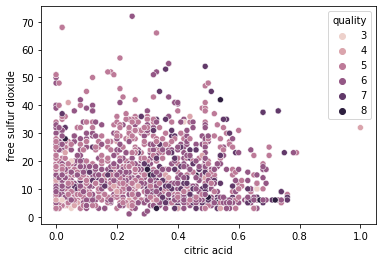

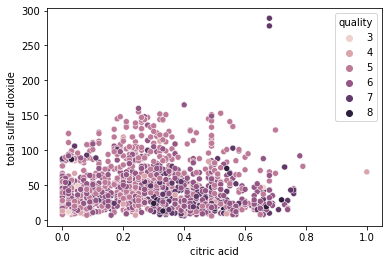

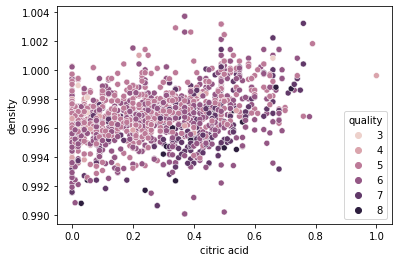

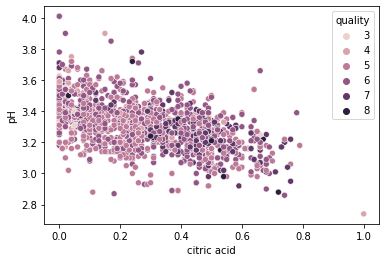

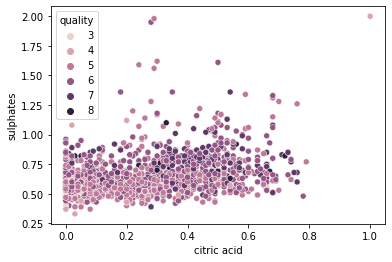

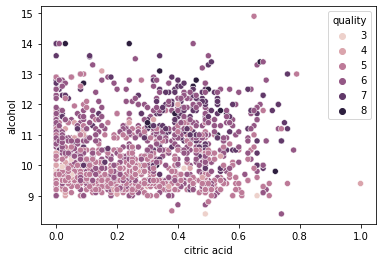

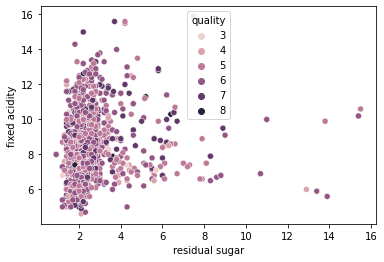

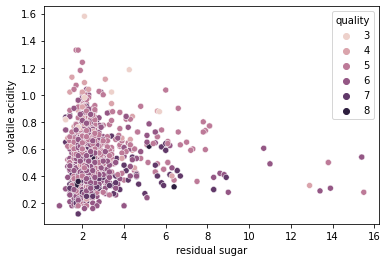

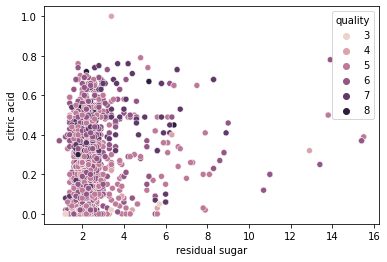

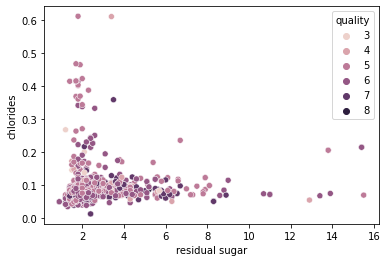

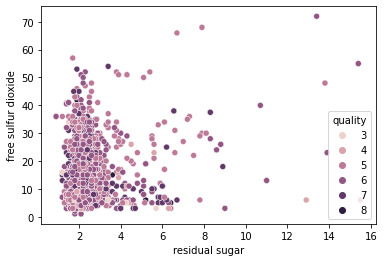

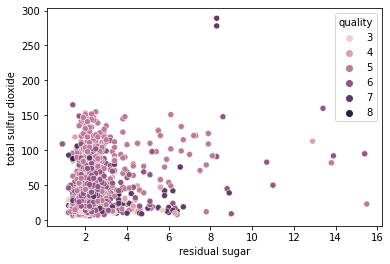

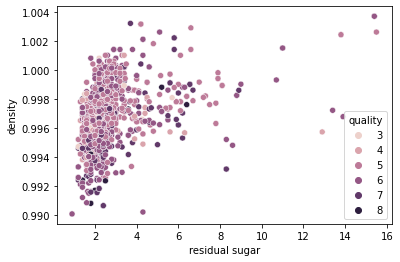

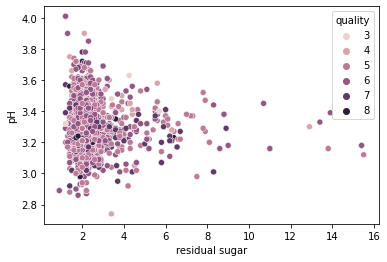

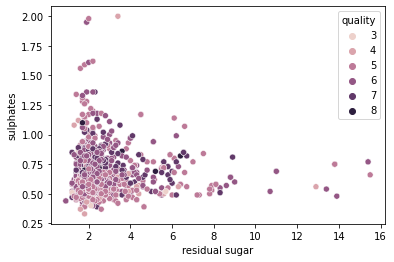

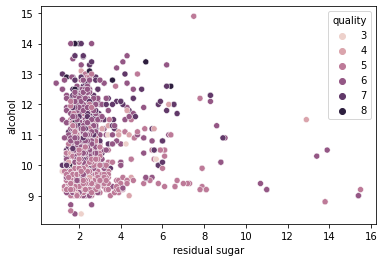

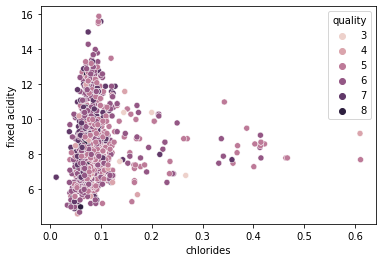

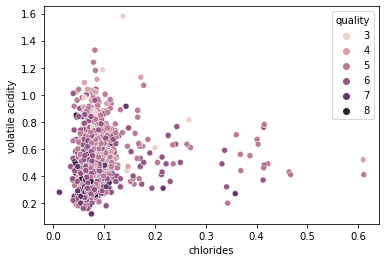

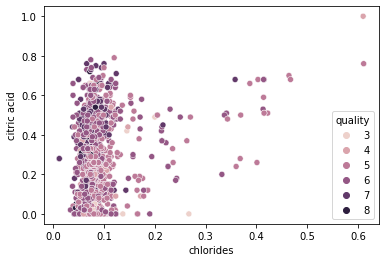

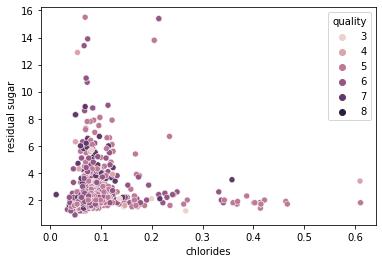

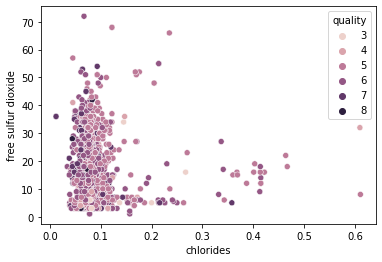

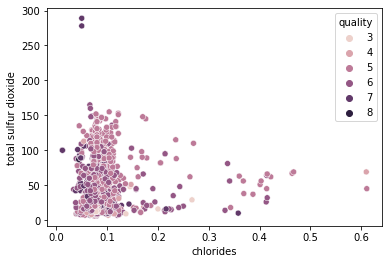

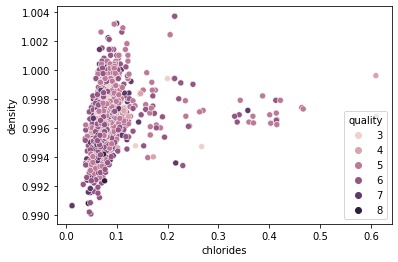

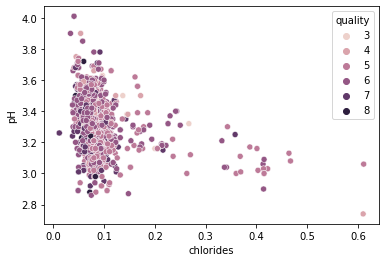

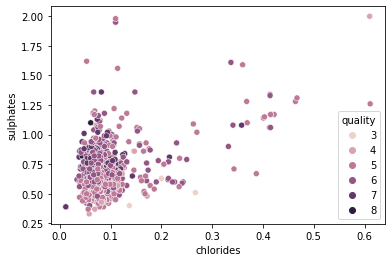

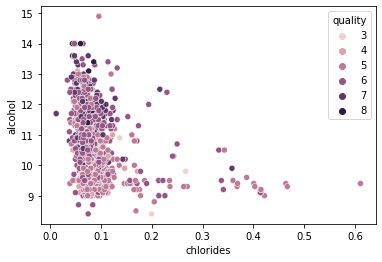

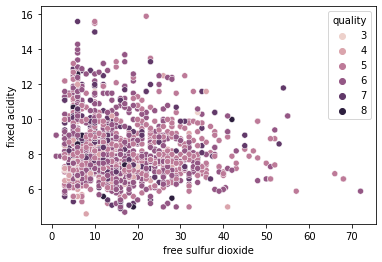

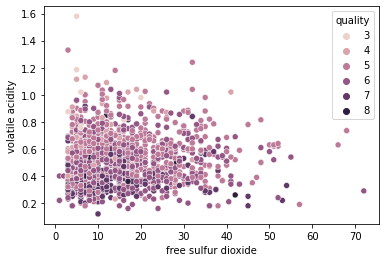

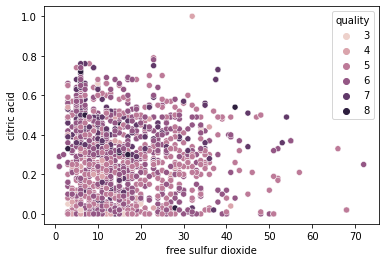

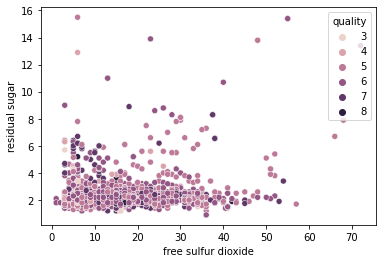

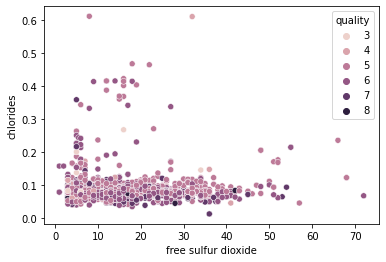

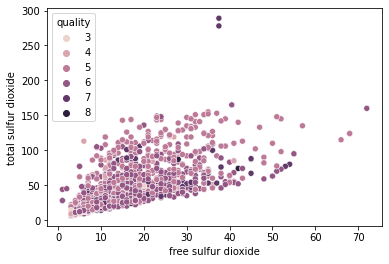

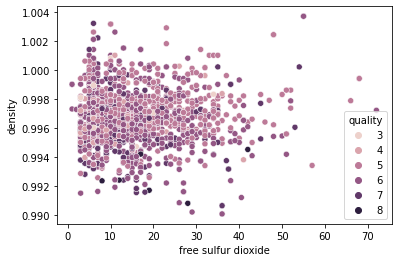

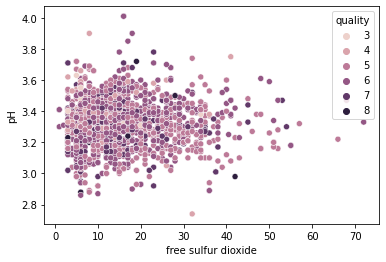

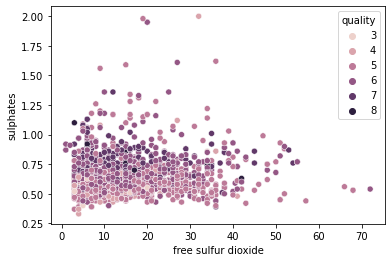

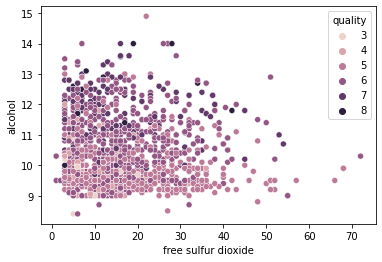

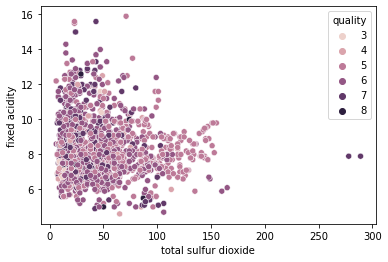

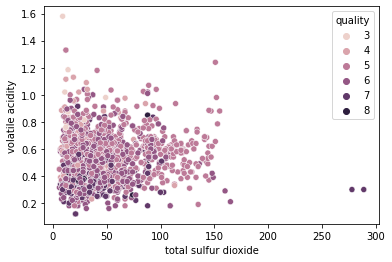

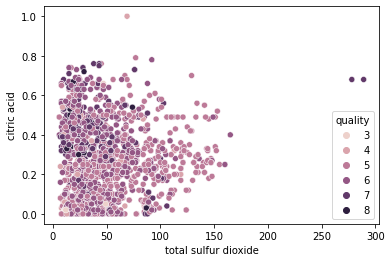

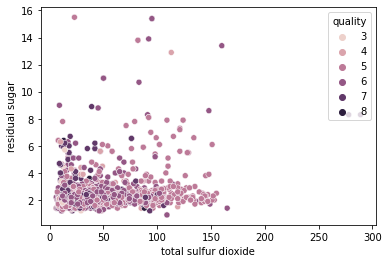

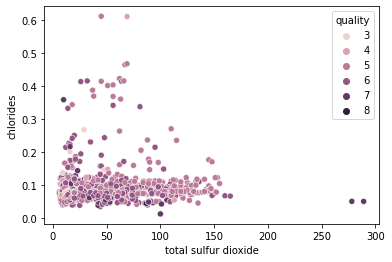

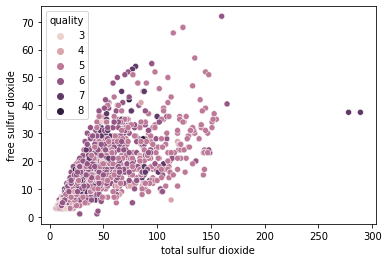

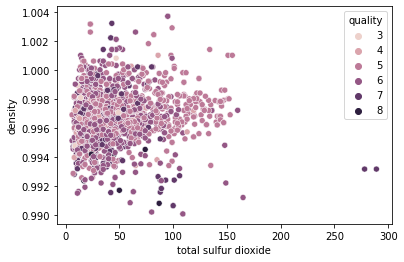

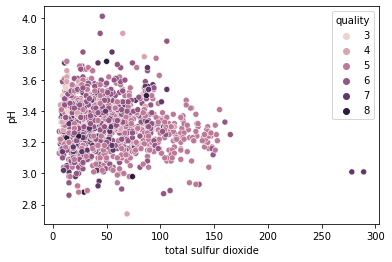

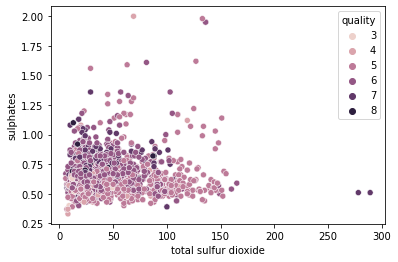

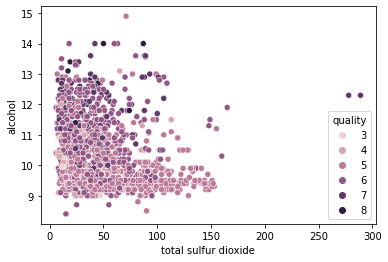

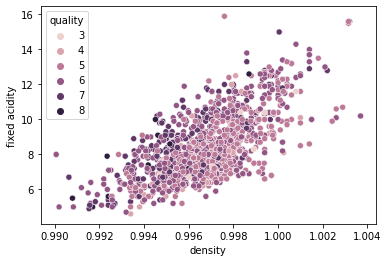

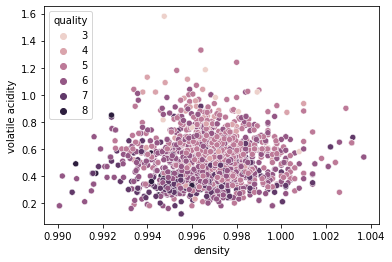

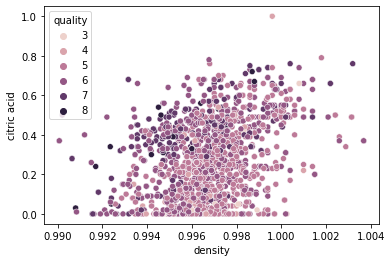

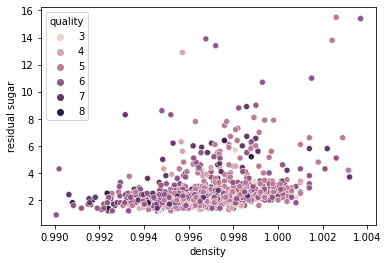

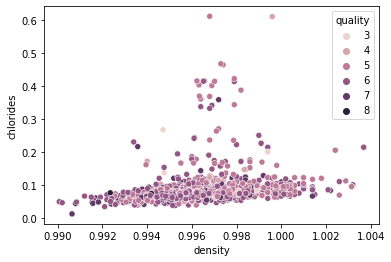

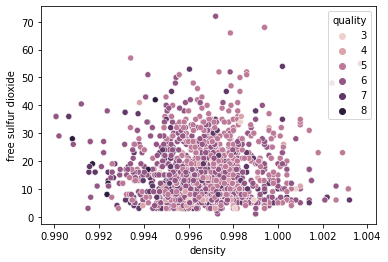

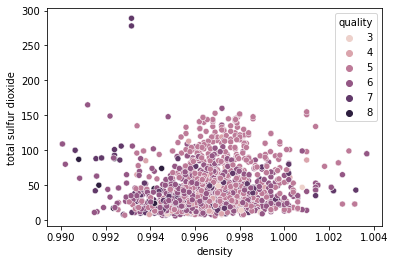

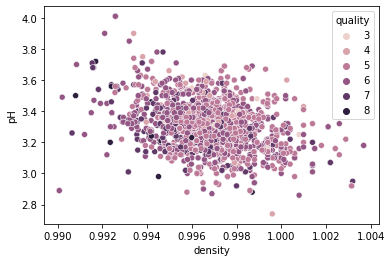

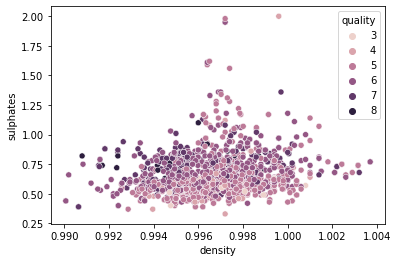

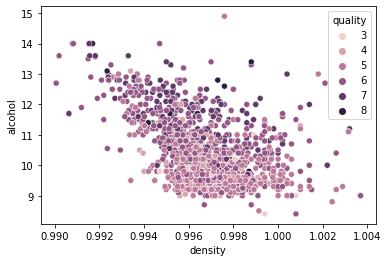

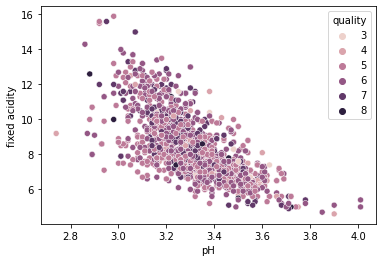

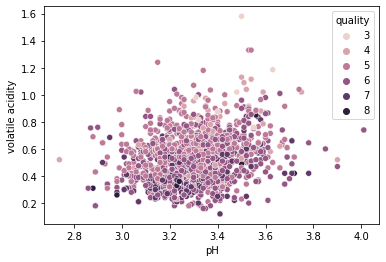

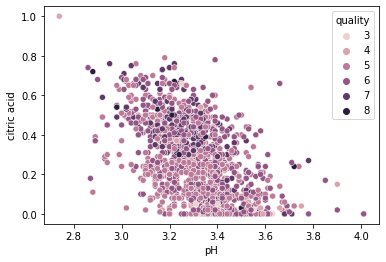

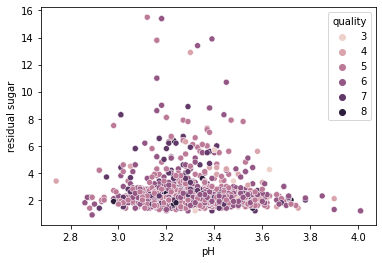

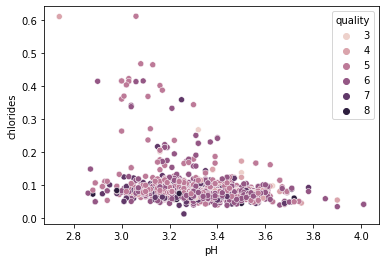

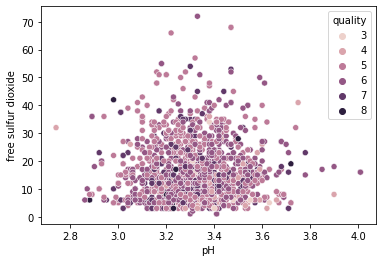

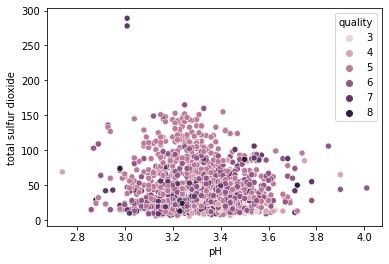

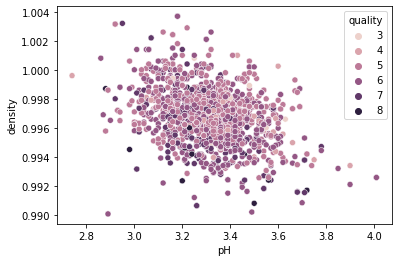

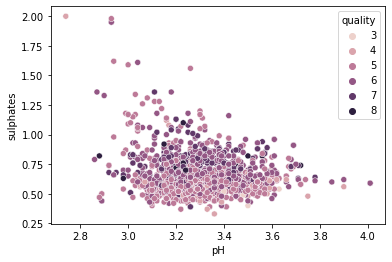

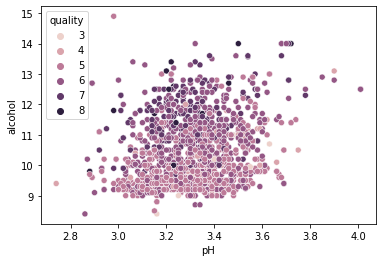

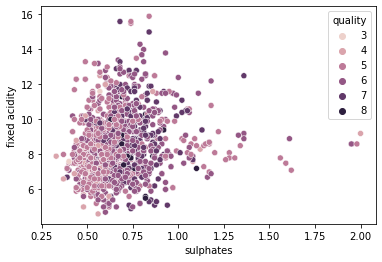

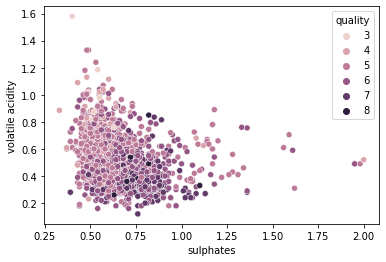

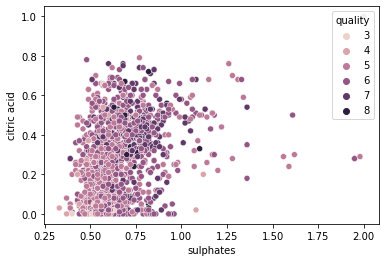

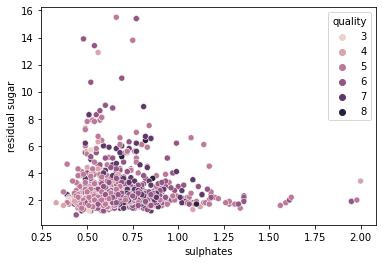

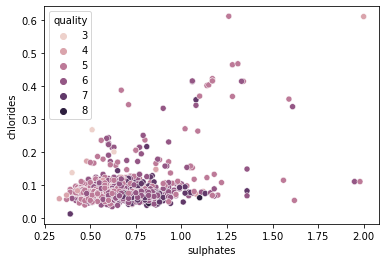

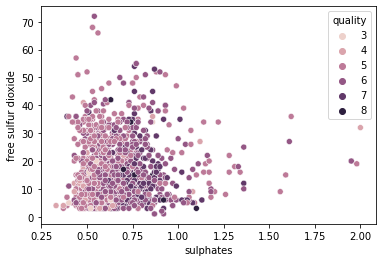

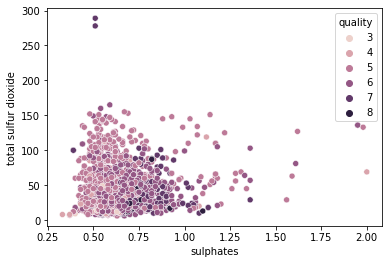

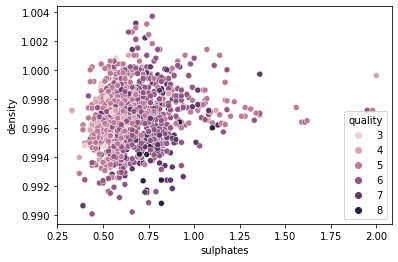

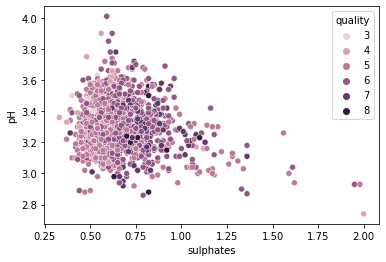

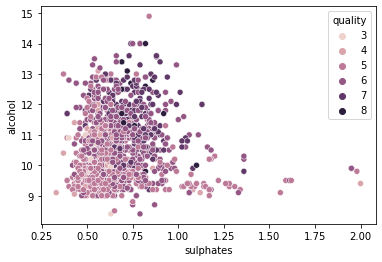

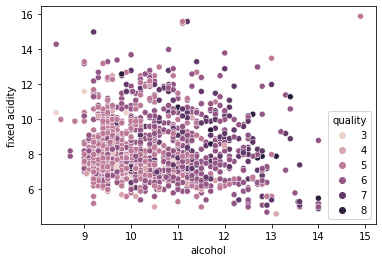

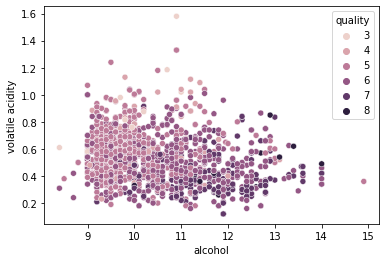

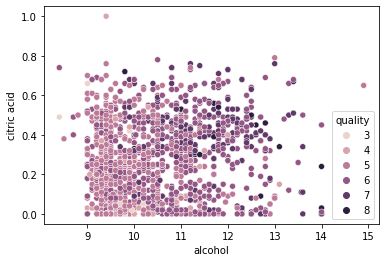

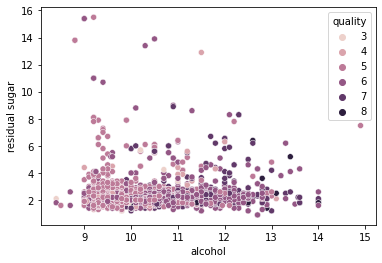

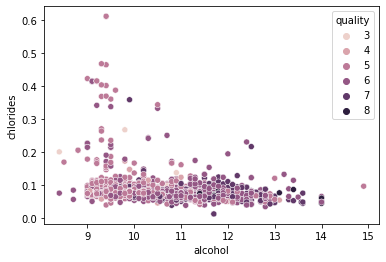

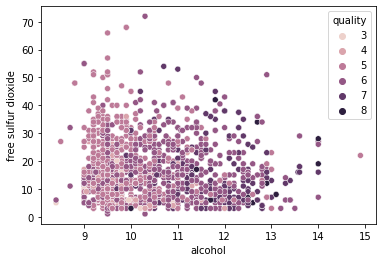

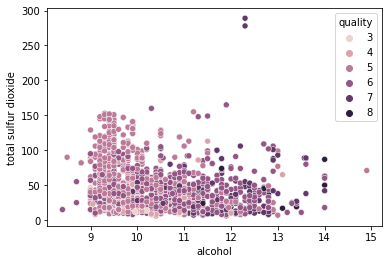

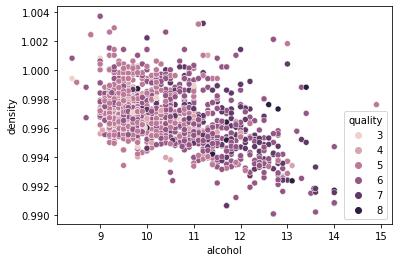

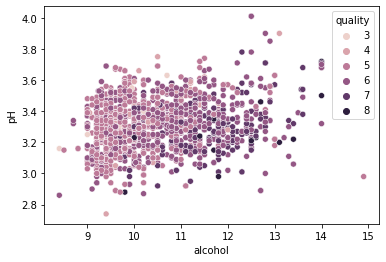

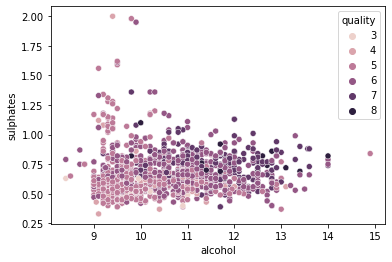

In [ ]:
#Issue 3: Plot scatter plots amongst the feature columns (considering all possible combinations) with the hue as "quality" and mention trends/patterns if any 
#refer to the below plot for an example:
for i in range(0,x-1):
  for j in range(0,x-1):
    if i!=j:
      sns.scatterplot(x=df.iloc[:,i],y=df.iloc[:,j],hue=df["quality"])
      plt.show()
#print("Pattern: Yes, Wine's with higher sulphates content(0.75-1.00) and lower volatile acidity(0.2-0.4) tend to have a higher quality")

# **C.Feature selection and data scaling**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
y=df.iloc[:,11]
X=df.iloc[:,[1,2,9,10]] #Using only top 4 columns with highest correlation to quality

In [ ]:
#Scaling the data
#Issue number 4: Scale the data (use variable name scaler1 to define the scaler)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X= scaler1.fit_transform(X)

# **2.Model creation**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41,stratify=y)

In [ ]:
#Issue 5: Create a KNeighbours Classifier Model with default prameters an print the accuracy on the test data 
#use variable 'model1' to instantiate your model
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1.fit(X_train, y_train)
facc=model1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  60.62499999999999 %




In [ ]:
model1 = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2,weights = 'distance')#algorithm = 'ball_tree'
model1.fit(X_train, y_train)
facc=model1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  75.3125 %




In [ ]:
#Issue 6: In a new cell below, improve the KNN Classifier model by tuning the parameters of the KNeighboursClassifier. Do not change any of the code above. Only a model with accuracy above 74% will be accepted.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf1.fit(X_train, y_train)
fac2=rf1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", fac2*100, "%\n\n")




Accuracy of final model is:  68.125 %




In [64]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',min_samples_split=4,class_weight="balanced")
rf2.fit(X_train, y_train)
fac3=rf1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", fac3*100, "%\n\n")



Accuracy of final model is:  68.125 %




In [67]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dc.fit(X_train, y_train)
fac4=dc.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", fac4*100, "%\n\n")



Accuracy of final model is:  64.6875 %




In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
fac5=nb.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", fac5*100, "%\n\n")



Accuracy of final model is:  57.8125 %




In [69]:
from sklearn.svm import SVC
c1 = SVC(kernel = 'rbf', random_state = 0)
c1.fit(X_train, y_train)
fac6=c1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", fac6*100, "%\n\n")



Accuracy of final model is:  61.25000000000001 %




In [70]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
d6=svm.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", d6*100, "%\n\n")



Accuracy of final model is:  57.8125 %


